# LANGCHAIN vs LANGRAPH 
- LangChain and LangGraph are both open-source AI frameworks for building LLM-powered applications, but they differ in their approach to handling complex workflows. LangChain excels at building linear, step-by-step processes, while LangGraph is designed for managing intricate, multi-agent workflows with branching, looping, and stateful interactions. 

# Imports

In [1]:
import os
from langchain_openai import ChatOpenAI
from langchain_groq import ChatGroq
from langchain.prompts import PromptTemplate
from langchain.prompts import ChatPromptTemplate
from langchain_core.output_parsers import JsonOutputParser
from typing import TypedDict
from langchain_core.output_parsers import StrOutputParser 
from pydantic import BaseModel, Field
from langchain_core.output_parsers import PydanticOutputParser
from langchain_core.output_parsers import XMLOutputParser
from langchain.schema.runnable import RunnableBranch


In [2]:
os.environ['OPENAI_API_KEY']=os.getenv("OPENAI_API_KEY", "")
os.environ['GTOQ_API_KEY']=os.getenv("GTOQ_API_KEY", "")
os.environ['LANGCHAIN_API_KEY']=os.getenv("LANGCHAIN_API_KEY", "")
os.environ['LANGCHAIN_PROJECT']=os.getenv("LANGCHAIN_PROJECT", "")
os.environ['LANGCHAIN_TRACING_V2'] = "true"

# Connecting to Various Chat Models

## OPENAI

In [3]:

llm = ChatOpenAI(
    openai_api_key=os.getenv("OPENAI_API_KEY", ""),
    temperature=0,
    model="gpt-4",
    streaming=True,
    verbose=True,
)

In [4]:
llm.invoke("is UK an independent country?")

AIMessage(content='Yes, the United Kingdom is an independent country. It consists of four constituent countries: England, Scotland, Wales, and Northern Ireland. It is a sovereign state located off the north-western coast of the European mainland.', additional_kwargs={}, response_metadata={'finish_reason': 'stop', 'model_name': 'gpt-4-0613', 'service_tier': 'default'}, id='run--7433d732-1c21-4dce-9f9b-2be2230f53ee-0')

## GROQ

In [5]:
groq_llm = ChatGroq(
    groq_api_key=os.getenv("GTOQ_API_KEY", ""),
    temperature=0,
    model="gemma2-9b-it",
    streaming=True,
    verbose=True,
)

In [6]:
groq_llm.invoke("is UK an independent country?")

AIMessage(content='The UK\'s status is complex and depends on how you define "independent." \n\n**Here\'s a breakdown:**\n\n* **Politically:** The UK is an independent sovereign state. It has its own government, laws, and military. It is not ruled by another country.\n* **Economically:** The UK is a member of the European Union\'s single market and customs union. This means there are some economic ties with other EU countries. However, the UK is also a major global player with its own independent economy.\n* **Historically:** The UK was part of the British Empire, which was a vast collection of colonies. While the empire has long since dissolved, some argue that the UK\'s history as a colonial power still influences its relationship with other countries.\n\n**Ultimately, whether or not you consider the UK to be "independent" is a matter of perspective.** \n\nIt is undoubtedly a sovereign state with its own government and laws, but its economic and historical ties to other countries are

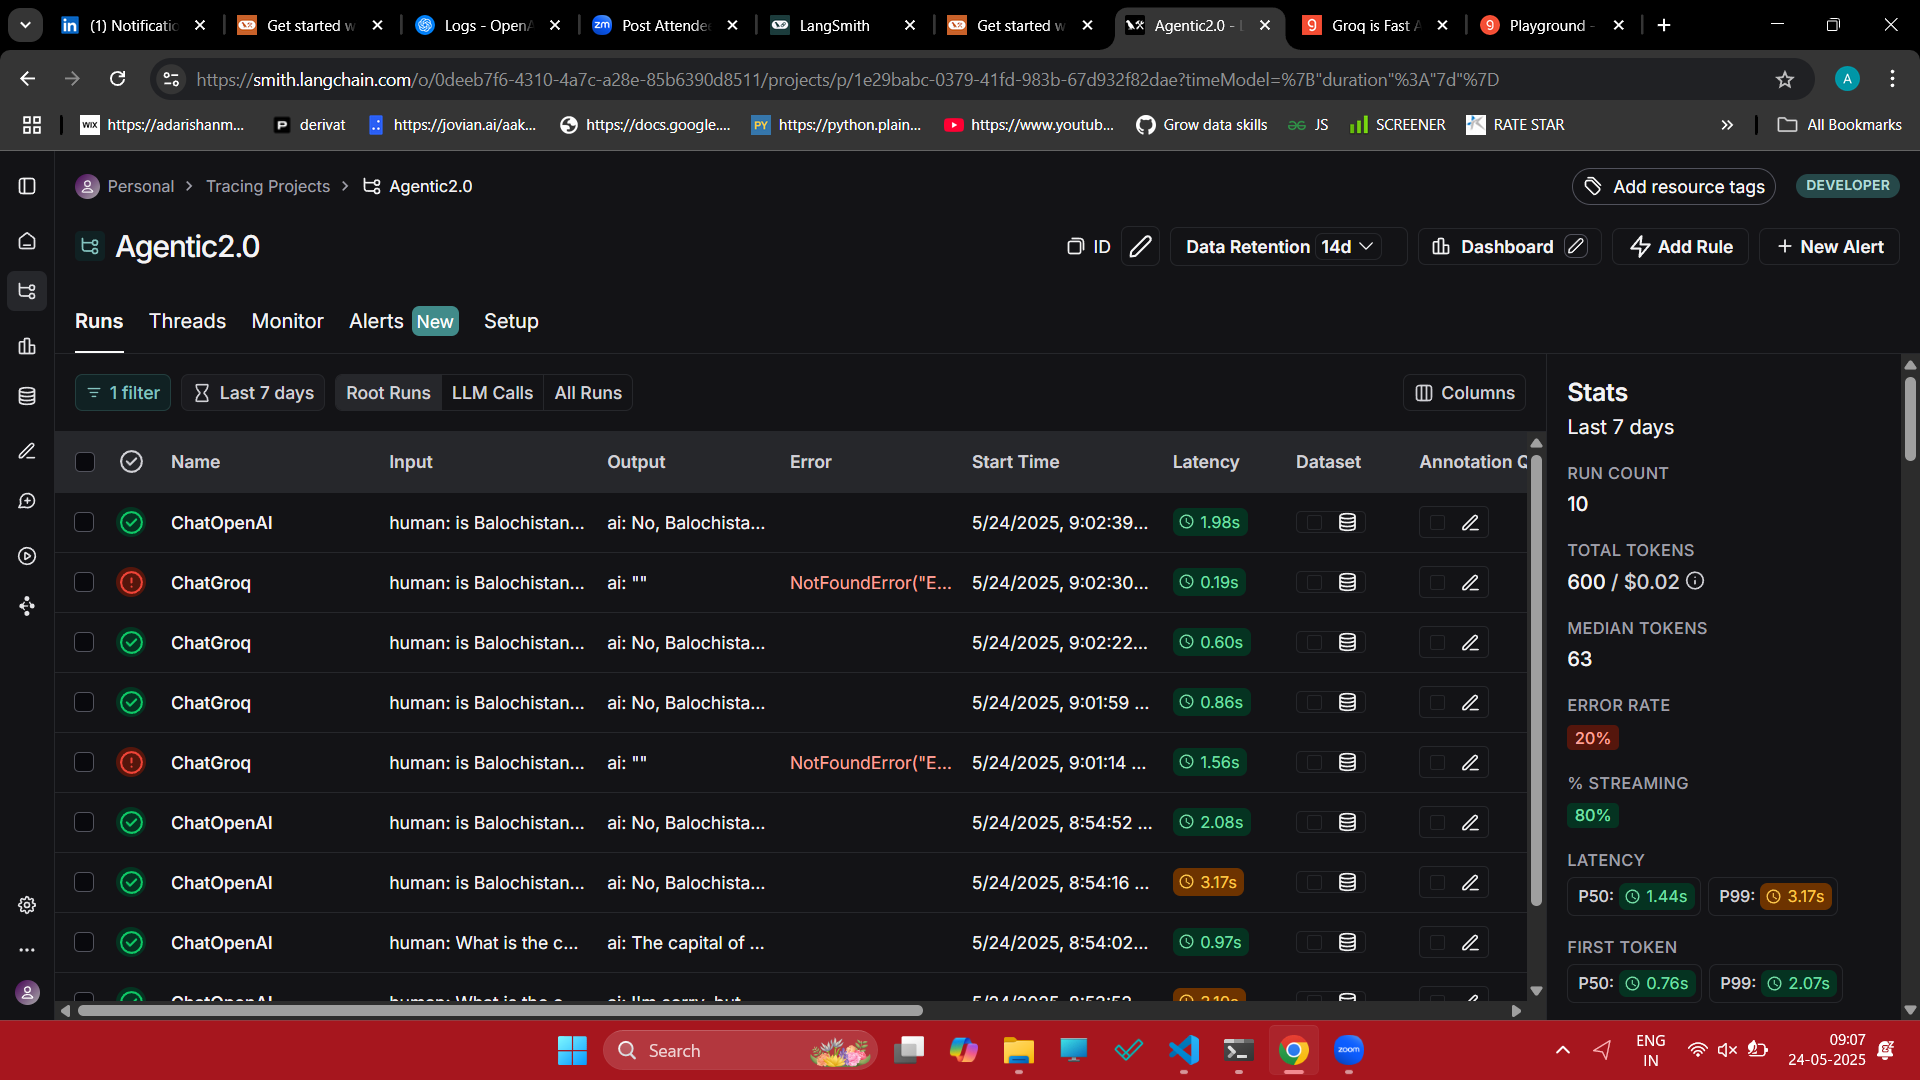

# Static vs Dynamic Prompts

In [7]:
from langchain.prompts import PromptTemplate

prompt = PromptTemplate.from_template("What is the capital of France?")
formatted_prompt = prompt.format()
response = llm.invoke(formatted_prompt)
print(response)

content='The capital of France is Paris.' additional_kwargs={} response_metadata={'finish_reason': 'stop', 'model_name': 'gpt-4-0613', 'service_tier': 'default'} id='run--6ebc1224-c192-4c9e-8101-e97248710fbe-0'


In [8]:
from langchain.prompts import PromptTemplate

prompt = PromptTemplate.from_template("What is the capital of {country}?")
formatted_prompt = prompt.format(country="India")
response = llm.invoke(formatted_prompt)
print(response)

content='The capital of India is New Delhi.' additional_kwargs={} response_metadata={'finish_reason': 'stop', 'model_name': 'gpt-4-0613', 'service_tier': 'default'} id='run--349c45bf-7dc5-4b32-be98-3d7c1360927a-0'


# F-Strings Vs Prompt Template

In [9]:
country = "India"
prompt = f"What is the capital of ?"
response = llm.invoke(prompt)
print(response)

content='Your question seems to be incomplete. Could you please provide the name of the country or state whose capital you want to know?' additional_kwargs={} response_metadata={'finish_reason': 'stop', 'model_name': 'gpt-4-0613', 'service_tier': 'default'} id='run--f20ccee2-5538-48dc-a77a-d110ab4dc6c7-0'


In [10]:
from langchain.prompts import PromptTemplate,load_prompt

country = "India"

prompt = PromptTemplate(
    input_variables=["country"],
    template="What is the capital of {country}?",
    validate_template=True,
)

# Format the prompt
formatted_prompt = prompt.format(country=country)

# Send to LLM
response = llm.invoke(formatted_prompt)
print(response)


content='The capital of India is New Delhi.' additional_kwargs={} response_metadata={'finish_reason': 'stop', 'model_name': 'gpt-4-0613', 'service_tier': 'default'} id='run--51ec4bd9-05fa-4de4-bbf4-2a40b7742ec7-0'


In [11]:
prompt.save('template.json')
loaded_prompt = load_prompt('template.json')
formatted_prompt = loaded_prompt.format(country=country)
print(formatted_prompt)
# Send to LLM
response = llm.invoke(formatted_prompt)
print(response)

What is the capital of India?
content='The capital of India is New Delhi.' additional_kwargs={} response_metadata={'finish_reason': 'stop', 'model_name': 'gpt-4-0613', 'service_tier': 'default'} id='run--c7de4452-02de-45f6-ab3e-73726684a8de-0'


# Messages in Langchain (Multiturn Conversations)

In [12]:
from langchain_community.chat_models import ChatOpenAI
from langchain_core.messages import HumanMessage, AIMessage, SystemMessage

# Initialize the Chat Model (you can set temperature or model_name if needed)
chat = ChatOpenAI()

# Prepare a conversation using messages
messages = [
    SystemMessage(content="You are a helpful assistant."),

]

# Invoke the model with message history
while(True):
    input_text = input("")
    if not input_text:
        break
    messages.append(HumanMessage(content=input_text))
    response = chat.invoke(messages)
    messages.append(AIMessage(content=response.content))

print(messages)


C:\Users\Adari Shanmukh\AppData\Local\Temp\ipykernel_16276\1604388302.py:5: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  chat = ChatOpenAI()


[SystemMessage(content='You are a helpful assistant.', additional_kwargs={}, response_metadata={})]


In [13]:
from langchain.prompts import ChatPromptTemplate
from langchain_community.chat_models import ChatOpenAI

# Initialize chat model
chat = ChatOpenAI()

# Create chat prompt template
prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a helpful {domain} expert"),
    ("human", "Explain in short about the {topic}"),
])

# Format the prompt with dynamic input
messages = prompt.format_messages(domain="social",topic="Demonitization")

# Pass messages to the model
response = chat.invoke(messages)

print(response.content)


Demonetization is a government policy that involves the discontinuation of a specific currency unit as legal tender. This typically involves replacing old currency notes with new ones, often with the aim of combating issues such as corruption, tax evasion, and black money. Demonetization can have significant economic and social impacts, and its success depends on various factors such as the implementation strategy and public support.


# MessagesPlaceholder

In [14]:
from langchain.prompts import ChatPromptTemplate, MessagesPlaceholder

chat_history = [
    ("human", "What is the capital of France?"),
    ("ai", "The capital of France is Paris."),
]
prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a helpful assistant."),
    MessagesPlaceholder(variable_name="chat_history"),
    ("human", "{input}")
])

# Format the prompt with dynamic input
messages = prompt.format_messages(chat_history=chat_history,input="What was my last question?")

# Pass messages to the model
response = chat.invoke(messages)

print(response.content)


Your last question was: "What is the capital of France?"


# Zero vs Few Shot Prompting

In [15]:
prompt = PromptTemplate.from_template(
    "Translate the following English sentence to French: {sentence}"
)

final_prompt = prompt.format(sentence="I love programming.")
response = llm.invoke(final_prompt)
print(response)

content="J'aime la programmation." additional_kwargs={} response_metadata={'finish_reason': 'stop', 'model_name': 'gpt-4-0613', 'service_tier': 'default'} id='run--677e3af0-e87d-4f83-a16e-a07be6d9f448-0'


In [16]:
from langchain.prompts import FewShotPromptTemplate, PromptTemplate
examples = [
    {"english": "Hello", "french": "Hello---------Bonjour"},
    {"english": "Goodbye", "french": "Goodbye-------Au revoir"}
]

# Template for each example
example_template = PromptTemplate.from_template("English: {english}\nFrench: {french}")

# Main prompt with few-shot examples
prompt = FewShotPromptTemplate(
    examples=examples,
    example_prompt=example_template,
    suffix="English: {input}\nFrench:",
    input_variables=["input"]
)

final_prompt = prompt.format(input="I love programming.")
response = llm.invoke(final_prompt)

print(response)
chain  = prompt | llm | StrOutputParser()
chain.invoke({"input": "is Balochistan an independent country?"})

content="J'aime la programmation." additional_kwargs={} response_metadata={'finish_reason': 'stop', 'model_name': 'gpt-4-0613', 'service_tier': 'default'} id='run--1708ea00-f74b-4093-bb0c-6cf793f160c2-0'


'Balochistan est-il un pays indépendant?'

# PARSERS IN LANGCHAIN

# StrOutputParser
- StrOutputParser is a simple output parser from LangChain used to extract plain text strings from the output of an LLM. It's useful when you're not dealing with structured outputs (like JSON or Pydantic models), but just want the model’s response as a raw string.



In [17]:

parser = StrOutputParser()

prompt = PromptTemplate.from_template(
    """Answer the following question and return the result.

Question: {question}"""
)

llm = ChatOpenAI(temperature=0)

chain = prompt | llm | parser

result = chain.invoke({"question": "What is the capital of India?"})
print(result)


The capital of India is New Delhi.


# JsonOutputParser
- JsonOutputParser is an output parser in LangChain that expects the LLM’s response to be a valid JSON object. It automatically parses that JSON into a Python dictionary.

In [18]:

parser = JsonOutputParser()

# 2. PromptTemplate with format instructions
prompt = PromptTemplate.from_template(
    """Answer the following question and return the result in JSON format use keys "answer" and "confidance".
{format_instructions}

Question: {question}
"""
).partial(format_instructions=parser.get_format_instructions())

# 3. Model (ChatOpenAI works even with non-chat prompts)
llm = ChatOpenAI(temperature=0)

# 4. Create the chain
chain = prompt | llm | parser

# 5. Run the chain
result = chain.invoke({"question": "Is UK an independent country?"})

# 6. Print output
print(result)


{'answer': 'Yes, the UK is an independent country.', 'confidence': 'High'}


# xml Parser
- XMLParser is used to parse LLM outputs formatted as XML. It extracts structured information from XML tags, making it suitable for tasks that involve hierarchical data. This parser helps in organizing and validating model responses using an XML schema.










In [29]:


# 1. Define XML instructions manually
xml_instructions = """Respond in the following XML format:
<response>
    <answer>...</answer>
    <confidence>...</confidence>
</response>"""

# 2. Create the prompt
prompt = PromptTemplate.from_template(
    """Answer the following question.
{xml_instructions}

Question: {question}
"""
).partial(xml_instructions=xml_instructions)

# 3. Model
llm = ChatOpenAI(temperature=0)

# 4. Chain
chain = prompt | llm

# 5. Run
result = chain.invoke({"question": "Is UK an independent country?"})
print(result.content)


content='<response>\n    <answer>Yes, the UK is an independent country.</answer>\n    <confidence>High</confidence>\n</response>' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 29, 'prompt_tokens': 47, 'total_tokens': 76, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None} id='run--fe93f8f2-fb77-4b5e-a406-2ffb794f4fa2-0'


# 📦 StructuredOutputParser in LangChain
- StructuredOutputParser is a powerful and flexible parser used in LangChain to:

- Parse model output into structured Python objects (like dict),

- Enforce a specific schema using Guardrails, Pydantic, or LangChain’s own format instructions.



In [35]:
from langchain.output_parsers import StructuredOutputParser, ResponseSchema
from langchain.prompts import PromptTemplate
from langchain.chat_models import ChatOpenAI

# Step 1: Define the response schema
response_schemas = [
    ResponseSchema(name="name", description="Name of the person"),
    ResponseSchema(name="age", description="Age in years (as integer)")
]
# Step 2: Create parser from schema
parser = StructuredOutputParser.from_response_schemas(response_schemas)

# Step 3: Create prompt with format instructions
prompt = PromptTemplate.from_template("""
Answer the following question.

{format_instructions}

text: {text}
""").partial(format_instructions=parser.get_format_instructions())

# Step 4: LLM and chain
llm = ChatOpenAI(temperature=0)
chain = prompt | llm | parser

# Step 5: Run it
output = chain.invoke({
    "text": "My name is Bob and I am thirty years old."
})

print(output)


{'name': 'Bob', 'age': 'thirty'}


# PydanticOutputParser
- PydanticOutputParser parses LLM output into a Pydantic model.
- It validates field types, required values, and structure.


In [36]:
# Step 1: Define your Pydantic model
class AnswerModel(BaseModel):
    """
    Schema to capture a person's basic details with validation-friendly descriptions.
    """
    name: str = Field(description="The name of the person.")
    age: int = Field(description="Age of the person (should be a number between 1 and 100).")

# Step 2: Create the parser
parser = PydanticOutputParser(pydantic_object=AnswerModel)

# Step 3: Define prompt with format instructions
prompt = PromptTemplate.from_template("""
Answer the following question.

{format_instructions}

text: {text}
""").partial(format_instructions=parser.get_format_instructions())

# Step 4: Load the LLM and chain
llm = ChatOpenAI(temperature=0)
chain = prompt | llm | parser

# Step 5: Run the chain
result = chain.invoke({"text": "My name is Bob and I am thirty years old."})
print(result)  # result is an instance of AnswerModel

name='Bob' age=30


## Assignment

In [37]:

class Product(BaseModel):
    """Product model with INR price restriction."""
    name: str = Field(..., min_length=2, max_length=50, description="Product name")
    price: float = Field(..., gt=0, description="Price must be in INR and > 0")
    stock: int = Field(default=0, ge=0, description="Non-negative integer")
    currency: str = Field(default="INR", description="Currency must be INR")
    
xml_instructions = """Respond in the following XML format:
<response>
    <name>...</name>
    <price>...</price>
    <stock>...</stock>
</response>"""



In [38]:

product_json_parser = JsonOutputParser(pydantic_object=Product)
product_pydantic_parser = PydanticOutputParser(pydantic_object=Product)
product_xml_parser = XMLOutputParser(pydantic_object=Product)


In [39]:
prompt_0 = PromptTemplate(
    template="You are a helpful assistant in india mart.\nFollow the rules {format_instructions}\n{input}\n",
    input_variables=["input"],
    partial_variables={"format_instructions": product_json_parser.get_format_instructions()},
)

prompt_1 = PromptTemplate(
    template="You are a helpful assistant in india mart.\nFollow the rules {format_instructions}\n{input}\n",
    input_variables=["input"],
    partial_variables={"format_instructions": product_pydantic_parser.get_format_instructions()},
)

prompt_2 = PromptTemplate(
    template="You are a helpful assistant in india mart.\n {format_instructions}\n{input}\n",
    input_variables=["input"],
    partial_variables={"format_instructions": xml_instructions},
    )



llm = ChatOpenAI(temperature=0.9)

# Build the runnable chain
chain0 = prompt_0 | llm | product_json_parser
chain1 = prompt_1 | llm | product_pydantic_parser
chain2 = prompt_2 | llm | product_xml_parser


print(chain0.invoke({"input": "iPhone 15"}))
print(chain1.invoke({"input": "iPhone 15"}))
print(chain2.invoke({"input": "iPhone 15"}))

{'name': 'iPhone 15', 'price': 100000, 'stock': 50, 'currency': 'INR'}
name='iPhone 15' price=90000.0 stock=50 currency='INR'
{'response': [{'name': 'iPhone 15'}, {'price': 'Rs. 75,000'}, {'stock': 'Available'}]}


## 🔥 temperature Explained:
- temperature is a parameter that controls the randomness or creativity of the model’s output.
- Temperature	Behavior	Use Case Examples
- 0.0	🔒 Deterministic / Repetitive	Facts, summaries, code, consistent output
- 0.9	🎨 Creative / Varied / Less predictable	Writing stories, brain

## Chains in LangChain
- Chains in LangChain are pipelines that connect components like prompts, LLMs, retrievers, and parsers to process input and generate output.
- We have Simple Chain,Sequential Chain,Conditional Chain, Parallel Chain

## Simple Chain
 - A single prompt passed to the LLM, returning one output directly.



In [40]:
# pip install grandalf

parser = StrOutputParser()

prompt = PromptTemplate.from_template(
    """Answer the following question and return the result.

Question: {question}"""
)

llm = ChatOpenAI(temperature=0)

chain = prompt | llm | parser

result = chain.invoke({"question": "Brief about INDIA"})
print(result)
chain.get_graph().print_ascii()  # Print the graph structure


India is a country located in South Asia, known for its rich history, diverse culture, and vibrant traditions. It is the seventh-largest country by land area and the second-most populous country in the world. India is a federal parliamentary democratic republic, with a President as the head of state and a Prime Minister as the head of government. The country is known for its ancient civilizations, including the Indus Valley Civilization and the Vedic period. India gained independence from British rule in 1947 and has since become a major player in global politics, economics, and culture. The country is known for its Bollywood film industry, diverse cuisine, and religious diversity, with Hinduism, Islam, Christianity, Sikhism, Buddhism, and Jainism being the major religions practiced in the country. India is also known for its iconic landmarks such as the Taj Mahal, the Red Fort, and the Gateway of India.
     +-------------+       
     | PromptInput |       
     +-------------+      

## Sequential Chain

In [41]:
# pip install grandalf

parser = StrOutputParser()

prompt1 = PromptTemplate.from_template(
    """Answer the following question and return the result.

Question: {question}"""
)

prompt2 = PromptTemplate.from_template(
    """Explain the Summary in one line and return the result.

Question: {summary}"""
)

llm = ChatOpenAI(temperature=0)

chain = prompt1 | llm | parser | prompt2 | llm | parser

result = chain.invoke({"question": "Give a 5 line summary about INDIA"})
print(result)
chain.get_graph().print_ascii()  # Print the graph structure


India is a diverse country in South Asia with a rich history, culture, and economy, known for its iconic landmarks and status as the second-most populous country in the world.
     +-------------+       
     | PromptInput |       
     +-------------+       
            *              
            *              
            *              
    +----------------+     
    | PromptTemplate |     
    +----------------+     
            *              
            *              
            *              
      +------------+       
      | ChatOpenAI |       
      +------------+       
            *              
            *              
            *              
   +-----------------+     
   | StrOutputParser |     
   +-----------------+     
            *              
            *              
            *              
+-----------------------+  
| StrOutputParserOutput |  
+-----------------------+  
            *              
            *              
            

## Parallel Chain

In [27]:

from langchain.schema.runnable import RunnableParallel
parser = StrOutputParser()

prompt1 = PromptTemplate.from_template(
    """Make a 5 line summary about {person} and return the result."""
)

prompt2 = PromptTemplate.from_template(
    """
    Make a Quiz about the summary of {person} and return the result.
    """
)

prompt3 = PromptTemplate.from_template(
    """
    Merge the following content and make a final output.

    Summary:
    {summary}

    Quiz:
    {quiz}
    """
)


llm = ChatOpenAI(temperature=0.0)

parallel_chain = RunnableParallel(
    {
        "summary": prompt1 | llm | parser,
        "quiz": prompt2 | llm | parser,
    }
)

merged_chain = prompt3 | llm | parser 
chain = parallel_chain | merged_chain
result = chain.invoke({"person": "Elon Musk"})
print(result)
chain.get_graph().print_ascii()  # Print the graph structure


Final Output:

Summary:
Elon Musk is a billionaire entrepreneur known for founding companies like SpaceX and Tesla. He is also involved in projects like Neuralink and The Boring Company. Musk is known for his ambitious goals, such as colonizing Mars and creating sustainable energy solutions. He has faced criticism for his controversial statements and behavior on social media. Despite this, Musk remains a prominent figure in the tech industry.

Quiz:
1. What is Elon Musk's full name?
a) Elon Reeve Musk

2. In which country was Elon Musk born?
c) South Africa

3. Which of the following companies did Elon Musk co-found?
c) Tesla

4. What is the name of Elon Musk's aerospace company?
b) SpaceX

5. Which of the following is NOT one of Elon Musk's ventures?
d) Blue Apron

6. What is the name of Elon Musk's electric car company?
c) Tesla

7. In which industry did Elon Musk make his initial fortune?
d) Internet

8. What is the name of Elon Musk's tunnel construction company?
a) The Boring Comp

## Conditional Chain

In [28]:


llm = ChatOpenAI(temperature=0)
parser = StrOutputParser()

# Prompt templates
summary_prompt = PromptTemplate.from_template("Give a summary of {topic}")
quiz_prompt = PromptTemplate.from_template("Make a quiz on {topic}")

# Chain definitions
summary_chain = summary_prompt | llm | parser
quiz_chain = quiz_prompt | llm | parser

# Lambda to decide routing
def route_selector(input):
    if "quiz" in input["task"].lower():
        return "quiz"
    else:
        return "summary"

# Branching logic
chain = RunnableBranch(
    (lambda x: x["task"] == "quiz", quiz_chain),
    (lambda x: x["task"] == "summary", summary_chain),
    # default fallback
    summary_chain
)

# Example usage
result = chain.invoke({"task": "quiz", "topic": "Python"})
print(result)

chain.get_graph().print_ascii()  # Print the graph structure


1. What is Python?
a) A type of snake
b) A programming language
c) A type of food

2. What is the syntax for printing "Hello, World!" in Python?
a) print("Hello, World!")
b) print("Hello, World!")
c) print("Hello, World!")

3. What is the correct way to declare a variable in Python?
a) variable = 10
b) var = 10
c) x = 10

4. What is the output of the following code snippet?
x = 5
y = 3
print(x + y)
a) 8
b) 15
c) 53

5. What is the purpose of the "if" statement in Python?
a) To loop through a block of code
b) To define a function
c) To execute a block of code only if a certain condition is true

6. What is the correct way to comment out a line of code in Python?
a) // This is a comment
b) # This is a comment
c) /* This is a comment */

7. What is the output of the following code snippet?
my_list = [1, 2, 3, 4, 5]
print(my_list[2])
a) 1
b) 2
c) 3

8. What is the purpose of the "for" loop in Python?
a) To execute a block of code a certain number of times
b) To define a function
c) To loop